In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Bio import PDB
from time import time
from tqdm import tqdm
%matplotlib inline

In [2]:
def center_atomic_coord (x,y,z):
    x, y, z = x-np.mean(x), y-np.mean(y), z-np.mean(z)
    return(x, y, z) 

def quaternion_rotation(a, b, c, d, x, y, z):
    q00=1-2*c**2-2*d**2
    q01=2*b*c-2*d*a
    q02=2*b*d+2*c*a
    q10=2*b*c+2*d*a
    q11=1-2*b**2-2*d**2
    q12=2*c*d-2*b*a
    q20=2*b*d-2*c*a
    q21=2*c*d+2*b*a
    q22=1-2*b**2-2*c**2
    Q=np.array([[q00,q01,q02],[q10,q11,q12],[q20,q21,q22]])
    positions=np.array([x,y,z])
    rotated_positions=np.dot(Q,positions)
    x_rotated=rotated_positions[0]
    y_rotated=rotated_positions[1]
    z_rotated=rotated_positions[2]
    return(x_rotated,y_rotated,z_rotated)

def i_sel (x,xi,sigma,n):
    return (i for i in range(len(x)) if abs(x[i]-xi)<=n*sigma)
    
def I_calculated_2 (q, x_atom, y_atom, z_atom, sigma, n, res):
    a=q[0]
    b=q[1]
    c=q[2]
    d=q[3]
    x_atom, y_atom, z_atom = center_atomic_coord (x_atom, y_atom, z_atom)
    x_atom, y_atom, z_atom = quaternion_rotation(a, b, c, d, x_atom, y_atom, z_atom)
    x = np.linspace(min(x_atom)-1,max(x_atom)+1, res)
    y = np.linspace(min(y_atom)-1,max(y_atom)+1, res)
    Ixy = 0    
    for atom in tqdm(range(len(x_atom))):
        X = np.zeros(len(x))
        Y = np.zeros(len(x))
        for i in range(len(x)):
            if abs(x[i]-x_atom[atom])<=n*sigma:
                X[i]=np.exp(-0.5*(((x[i]-x_atom[atom])/sigma)**2))
            if abs(y[i]-y_atom[atom])<=n*sigma:
                Y[i]=np.exp(-0.5*(((y[i]-y_atom[atom])/sigma)**2))
        Ixy += np.array([X[i]*Y for i in range(len(x))])
    return(np.sqrt(2*np.pi)*sigma*Ixy, x, y)

def I_calculated_3 (q, x_atom, y_atom, z_atom, sigma, n, res):
    a=q[0]
    b=q[1]
    c=q[2]
    d=q[3]
    x_atom, y_atom, z_atom = center_atomic_coord (x_atom, y_atom, z_atom)
    x_atom, y_atom, z_atom = quaternion_rotation(a, b, c, d, x_atom, y_atom, z_atom)
    x = np.linspace(min(x_atom)-1,max(x_atom)+1, res)
    y = np.linspace(min(y_atom)-1,max(y_atom)+1, res)
    Ixy = 0    
    for atom in tqdm(range(len(x_atom))):
        X = np.zeros(len(x))
        Y = np.zeros(len(x))
        i_x_selected=list(i_sel (x,x_atom[atom],sigma,n))
        i_y_selected=list(i_sel (y,y_atom[atom],sigma,n))
        X[i_x_selected]=np.exp(-0.5*(((x[i_x_selected]-x_atom[atom])/sigma)**2))
        Y[i_y_selected]=np.exp(-0.5*(((y[i_y_selected]-y_atom[atom])/sigma)**2))
        Ixy += np.array([X[i]*Y for i in range(len(x))])
    return(np.sqrt(2*np.pi)*sigma*Ixy, x, y)

def I_calculated_4 (q, x_atom, y_atom, z_atom, sigma, n, res):
    a=q[0]
    b=q[1]
    c=q[2]
    d=q[3]
    x_atom, y_atom, z_atom = center_atomic_coord (x_atom, y_atom, z_atom)
    x_atom, y_atom, z_atom = quaternion_rotation(a, b, c, d, x_atom, y_atom, z_atom)
    x = np.linspace(min(x_atom)-1,max(x_atom)+1, res)
    y = np.linspace(min(y_atom)-1,max(y_atom)+1, res)
    Ixy_ac=0
    for atom in tqdm(range(len(x_atom))):
        Ixy = np.zeros(len(x)**2).reshape((len(x),len(x)))
        for i in range(len(x)):
            if abs(x[i]-x_atom[atom])<=n*sigma:
                for j in range(len(y)):
                    if abs(y[j]-y_atom[atom])<=n*sigma:
                        Ixy[i][j]=np.exp(-0.5*(((x[i]-x_atom[atom])/sigma)**2))*np.exp(-0.5*(((y[j]-y_atom[atom])/sigma)**2))
        Ixy_ac += Ixy
        #print("ATOM", atom)
        #print(Ixy,"\n",Ixy_ac)
        #print(" ")
    return(np.sqrt(2*np.pi)*sigma*Ixy_ac)

def I_calculated_5 (q, x_atom, y_atom, z_atom, sigma, n, res):
    a=q[0]
    b=q[1]
    c=q[2]
    d=q[3]
    x_atom, y_atom, z_atom = center_atomic_coord (x_atom, y_atom, z_atom)
    x_atom, y_atom, z_atom = quaternion_rotation(a, b, c, d, x_atom, y_atom, z_atom)
    x = np.linspace(min(x_atom)-1,max(x_atom)+1, res)
    y = np.linspace(min(y_atom)-1,max(y_atom)+1, res)
    Ixy_ac=0
    for atom in tqdm(range(len(x_atom))):
        Ixy = np.zeros(len(x)**2).reshape((len(x),len(x)))
        for i in range(len(x)):
            if abs(x[i]-x_atom[atom])<=n*sigma:
                for j in range(len(y)):
                    if abs(y[j]-y_atom[atom])<=n*sigma:
                        Ixy[i][j]=np.exp(-0.5*(((x[i]-x_atom[atom])/sigma)**2))*np.exp(-0.5*(((y[j]-y_atom[atom])/sigma)**2))
        Ixy_ac += Ixy
        #print("ATOM", atom)
        #print(Ixy,"\n",Ixy_ac)
        #print(" ")
    return(np.sqrt(2*np.pi)*sigma*Ixy_ac)

def collective_variable(Ical, I):
    s=0
    for x in range(len(Ical)):
        for y in range(len(Ical)):
            s+=Ical[x,y]*I[x,y]
    return(-s) 
    
def gradient_s(Ical, I, sigma, x, x_atom):
    sgrad=np.zeros(len(x_atom))
    for atom in tqdm(range(len(x_atom))):
        sgrad_cont=0
        for i in range(len(Ical)):
            for j in range(len(Ical)):
                sgrad_cont+=(x[i]-x_atom[atom])*Ical[i,j]*I[i,j]
        sgrad[atom]=sgrad_cont
    return(-sgrad/(sigma**2))

def gradient_s_2(Ical, I, sigma, x, x_atom):
    Sxy=np.matmul(Ical, np.transpose(I))
    sgrad=np.zeros(len(x_atom))
    for atom in tqdm(range(len(x_atom))):
        sgrad_cont=0
        for i in range(len(Sxy)):
            sgrad_cont+=(x[i]-x_atom[atom])*Sxy[i,i]
        sgrad[atom]=sgrad_cont
    return(-sgrad/(sigma**2))

100%|██████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1337.15it/s]


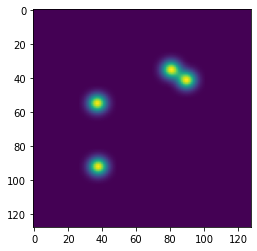

100%|██████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 2005.17it/s]

s = -10.758643612861864
sgrad_x = [-697.29915531  862.93639801 -885.04530011 -279.0178826 ]
sgrad_x_3 = [-697.29915531  862.93639801 -885.04530011 -279.0178826 ]


In [3]:
#Example: N atoms in random coordinates
N=4
n=3                         #Sigma times
res=128                    #Resolution
sigma=1*10**(-1)            #Standar deviation of the Gaussians
q=[0,0, 0, 0]

g=0.1


x_a=np.random.random(N) * 2 - 1   #x random atomic coordinates
y_a=np.random.random(N) * 2 - 1   #y random atomic coordinates
z_a=np.random.random(N) * 2 - 1   #y random atomic coordinates

#for atom in range(n_atoms):
#    print("ATOM", atom)
#    print("xsel=", list(i_sel (x,x_a[atom],sigma,n)))
#    print("ysel=", list(i_sel (y,y_a[atom],sigma,n)))
#    print("")

Ixy, x, y= I_calculated_2 (q, x_a, y_a, z_a, sigma, n, res)
#print(Ixy)
plt.imshow(Ixy)
plt.show()

noise=np.random.normal(0, g, Ixy.shape)
I=Ixy+noise
s=collective_variable(Ixy,I)
sgrad=gradient_s(Ixy, I, sigma, x, x_a)
sgrad3=gradient_s_2(Ixy, I, sigma, x, x_a)
print("s =", s)
print("sgrad_x =", sgrad)
print("sgrad_x_3 =", sgrad3)

In [4]:
#Importation of the 1xck's PDB to extract XYZ atomic coordinates
parser = PDB.PDBParser()
io = PDB.PDBIO()
struct = parser.get_structure('1xck','1xck.pdb')
x_atom=[]
y_atom=[]
z_atom=[]
for chains in struct:
    for chain in chains:
        for residue in chain:                             
            for atom in residue:
                x_atom.append(atom.get_vector()[0])
                y_atom.append(atom.get_vector()[1])
                z_atom.append(atom.get_vector()[2])
x_atom=np.array(x_atom)
y_atom=np.array(y_atom)
z_atom=np.array(z_atom)

C:\Users\Arley\anaconda3\lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 56763.
  warnings.warn(
C:\Users\Arley\anaconda3\lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 56800.
  warnings.warn(
C:\Users\Arley\anaconda3\lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 56858.
  warnings.warn(
C:\Users\Arley\anaconda3\lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 56887.
  warnings.warn(
C:\Users\Arley\anaconda3\lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 56921.
  warnings.warn(
C:\Users\Arley\anaconda3\lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 56979.
  warnings.warn(
C:\Users\A

100%|██████████████████████████████████████████████████████████████████████████| 55301/55301 [00:07<00:00, 7272.39it/s]


s= -39727389.023866475
s_grad_x= [1.10947606e+09 1.06402796e+09 1.08397114e+09 ... 1.28816990e+09
 8.40998389e+08 8.30232270e+08]
Execution time (sec)= 40.41152739524841  sec


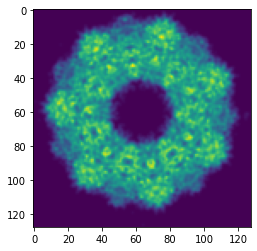

In [7]:
start_time=time()
## Parameters
n=3                #Sigma times
sigma=1            #Standar deviation of the Gaussians
#plane="xz"         #Projection plane
res=128            #Grid's resolution
q=[0,0,1/np.sqrt(2),1/np.sqrt(2)]

g=1

## Calculation and Graph of I(plane)

Ixy, x, y= I_calculated_3 (q, x_atom, y_atom, z_atom, sigma, n, res)
#np.savetxt("Ical_1xck_tens_sigma_{}_res_{}_{}.txt".format(sigma,res,plane), Ic, fmt="%s")
plt.imshow(Ixy)
#plt.rcParams["figure.figsize"] = (5,5)
#plt.savefig("Ical_1xck_tens_sigma_{}_res_{}_{}.png".format(sigma,res,plane))
noise=np.random.normal(0, g, Ixy.shape)
I=Ixy+noise
s=collective_variable(Ixy,I)
sgrad=gradient_s_2(Ixy, I, sigma, x, x_atom)
print("s=", s)
print("s_grad_x=", sgrad)
final_time=time()-start_time
print("Execution time (sec)=", final_time," sec")
#print("Execution time (min)=", final_time/60," min")
#print("Execution time (hours)=", final_time/3600," hours")